In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
# from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
%matplotlib inline

Using TensorFlow backend.


In [4]:
cd Conv

/home/royal/Downloads


In [64]:
train_i=ImageDataGenerator().flow_from_directory(directory='dataset/train',target_size=(28,28),batch_size=10,classes=['cats','dogs','selena'])

Found 8323 images belonging to 3 classes.


In [65]:
test_i=ImageDataGenerator().flow_from_directory(directory='dataset/test',target_size=(28,28),batch_size=10,classes=['cats','dogs','selena'])

Found 2058 images belonging to 3 classes.


In [55]:
imgs,labels = next(train_i) 

In [128]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.core import Activation

clf= Sequential()

clf.add(Conv2D(32, (5, 5), input_shape = (224,224, 3), activation = 'relu'))

clf.add(MaxPooling2D(pool_size = (2, 2)))

clf.add(Conv2D(32, (3, 3), activation = 'relu'))
clf.add(MaxPooling2D(pool_size = (2, 2)))

clf.add(Conv2D(64, (3, 3), activation = 'relu'))
clf.add(MaxPooling2D(pool_size = (2, 2)))

clf.add(Flatten())
clf.add(Dense(500))
clf.add(Activation("relu"))

clf.add(Dense(3))
clf.add(Activation("sigmoid"))
clf.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [129]:
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, fill_mode="nearest")

clf.compile(loss="binary_crossentropy", optimizer='adam',
    metrics=["accuracy"])

# clf.fit_generator(train_i,validation_data=test_i, steps_per_epoch=8000//20,
# epochs=10,verbose=1)


In [130]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [131]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [135]:
train_generator = train_datagen.flow_from_directory(
        'dataset/train',  # this is the target directory
        target_size=(224,224),  # all images will be resized to 150x150
        batch_size=10,
        class_mode='categorical')

Found 8323 images belonging to 3 classes.


In [74]:
validation_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(28,28),
        batch_size=10,
        class_mode='categorical')

Found 2058 images belonging to 3 classes.


In [76]:
clf.fit_generator(
        train_generator,
        steps_per_epoch=4000 // 10,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=800 // 10)

Epoch 1/10
200/200 [==============================] - 15s 73ms/step - loss: 0.5259 - acc: 0.6548 - val_loss: 0.5018 - val_acc: 0.6517
Epoch 2/10
200/200 [==============================] - 14s 70ms/step - loss: 0.5158 - acc: 0.6670 - val_loss: 0.4959 - val_acc: 0.6675
Epoch 3/10
200/200 [==============================] - 14s 70ms/step - loss: 0.5142 - acc: 0.6695 - val_loss: 0.4975 - val_acc: 0.6675
Epoch 4/10
200/200 [==============================] - 14s 70ms/step - loss: 0.5144 - acc: 0.6735 - val_loss: 0.4960 - val_acc: 0.6750
Epoch 5/10
200/200 [==============================] - 14s 72ms/step - loss: 0.5156 - acc: 0.6681 - val_loss: 0.4937 - val_acc: 0.6821
Epoch 6/10
200/200 [==============================] - 15s 74ms/step - loss: 0.5084 - acc: 0.6775 - val_loss: 0.4953 - val_acc: 0.6688
Epoch 7/10
200/200 [==============================] - 15s 77ms/step - loss: 0.5092 - acc: 0.6810 - val_loss: 0.4821 - val_acc: 0.7250
Epoch 8/10
200/200 [==============================] - 15s 73ms

In [10]:
cd dataset/single_prediction/

/home/royal/Downloads/Convolutional_Neural_Networks/Convolutional_Neural_Networks/dataset/single_prediction


In [11]:
ls

ca.jpg  cat.jpg  d.jpg  dogg.jpg  r.jpg  rr.jpg  sel.jpg


In [12]:
from keras.preprocessing import image

In [13]:
img=image.load_img('sel.jpg', target_size=(220,220))


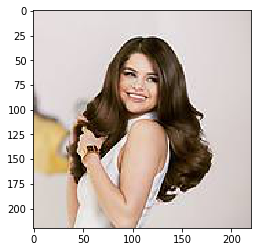

In [14]:
plt.imshow(img)

In [123]:
x = image.img_to_array(img)
x = x.astype("float") / 255.0
x = np.expand_dims(x, axis=0)

In [124]:
clf.predict(x)[0]


array([0.32679695, 0.57362443, 0.1248962 ], dtype=float32)

In [ ]:
clf.predict(x)[0]


In [126]:
if ((cat>dog) and (cat>selena)):
    label='cat'
    proba=cat*100
elif ((dog>cat) and (dog>selena)):
    label='dog'
    proba=dog*100
else:
    label='selena'
    proba=selena*100    

In [127]:
label,proba

('dog', 57.36244320869446)

In [112]:
text=label+ ' ' +str(proba)[:5]

In [115]:
cv2.putText(x, text, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,0.7, (255, 0, 0), 2)


array([[[[0.9372549 , 0.9372549 , 0.9372549 ],
         [0.9372549 , 0.9372549 , 0.9372549 ],
         [0.94117647, 0.94117647, 0.94117647],
         ...,
         [0.77254902, 0.58823529, 0.50980392],
         [0.96078431, 0.96078431, 0.96078431],
         [0.96078431, 0.96078431, 0.96078431]],

        [[0.9372549 , 0.9372549 , 0.9372549 ],
         [0.9372549 , 0.9372549 , 0.9372549 ],
         [0.9372549 , 0.9372549 , 0.9372549 ],
         ...,
         [0.89411765, 0.67843137, 0.56078431],
         [0.95686275, 0.95686275, 0.96470588],
         [0.95686275, 0.95686275, 0.95686275]],

        [[0.93333333, 0.93333333, 0.93333333],
         [0.93333333, 0.93333333, 0.93333333],
         [0.9372549 , 0.9372549 , 0.9372549 ],
         ...,
         [0.90588235, 0.67058824, 0.62745098],
         [0.95686275, 0.95686275, 0.95686275],
         [0.95686275, 0.95686275, 0.96470588]],

        ...,

        [[0.89019608, 0.78431373, 0.70980392],
         [0.38039216, 0.29803922, 0.27843137]